In [16]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv('supermarket.csv')
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

<AxesSubplot:>

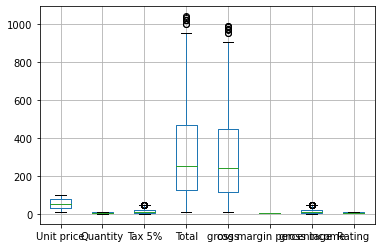

In [6]:
df.boxplot()

C:\Users\karth\AppData\Local\Temp/ipykernel_16272/2409895424.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


<AxesSubplot:>

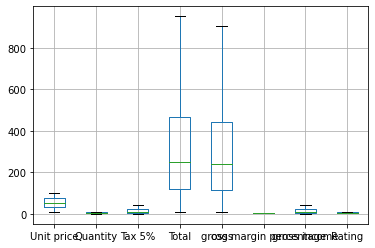

In [17]:
cols = ['Tax 5%', 'Total','gross margin percentage','Payment']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.boxplot()

In [9]:
df["Total"].value_counts()

829.0800    2
93.7440     2
217.6335    2
189.0945    2
470.9880    2
           ..
404.6490    1
151.4835    1
411.3795    1
565.2150    1
649.2990    1
Name: Total, Length: 981, dtype: int64

<AxesSubplot:title={'center':'Grouped by Total'}, xlabel='Total', ylabel='count'>

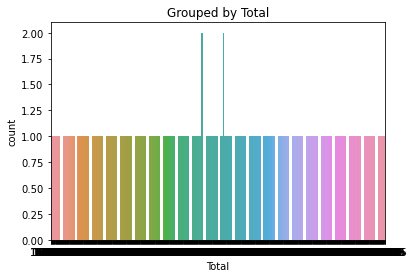

In [14]:
plt.title('Grouped by Total')
sns.countplot(x="Total",data=df)

In [12]:
df["Payment"].value_counts()

Ewallet        342
Cash           342
Credit card    307
Name: Payment, dtype: int64

<AxesSubplot:title={'center':'Grouped by Payment'}, xlabel='Payment', ylabel='count'>

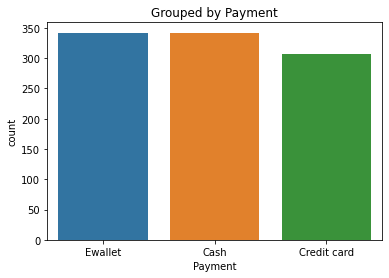

In [13]:
plt.title('Grouped by Payment')
sns.countplot(x="Payment",data=df)

<AxesSubplot:title={'center':'Grouped by City'}, xlabel='City', ylabel='count'>

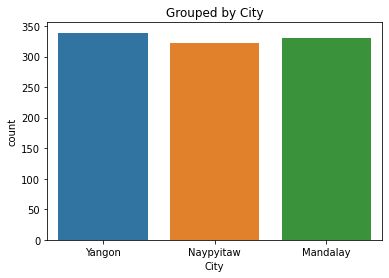

In [18]:
df["City"].value_counts()
plt.title('Grouped by City')
sns.countplot(x="City",data=df)

<AxesSubplot:title={'center':'Grouped by Product line'}, xlabel='Product line', ylabel='count'>

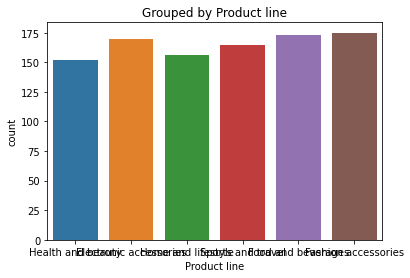

In [19]:
df["Product line"].value_counts()
plt.title('Grouped by Product line')
sns.countplot(x="Product line",data=df)

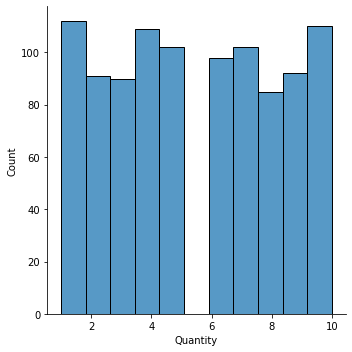

In [20]:
sns.displot(df["Quantity"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

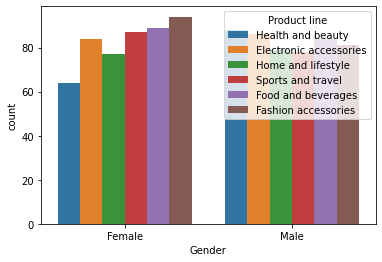

In [21]:
sns.countplot(x="Gender",hue="Product line",data=df)

<AxesSubplot:xlabel='Total', ylabel='count'>

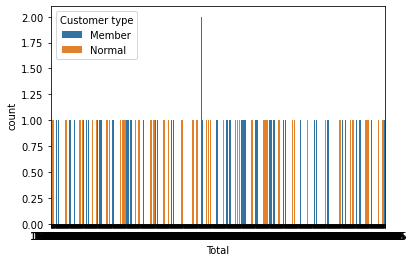

In [26]:
sns.countplot(x="Total",hue="Customer type",data=df)

In [25]:
pd.crosstab(df["Total"],df["Payment"])

Payment   Cash  Credit card  Ewallet
Total                               
10.6785      1            0        0
12.6945      0            1        0
13.1670      1            0        0
13.4190      0            0        1
14.6790      0            0        1
...        ...          ...      ...
942.9000     0            1        0
943.2990     1            0        0
944.6220     0            1        0
950.2500     1            0        0
951.8250     0            0        1

[981 rows x 3 columns]

In [27]:
pd.crosstab(df["Quantity"],df["City"])

City      Mandalay  Naypyitaw  Yangon
Quantity                             
1               32         44      36
2               33         30      28
3               36         20      34
4               39         33      37
5               28         30      44
6               36         31      31
7               28         38      36
8               30         30      25
9               34         27      31
10              34         39      37

In [28]:
df.corr()

Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000 -0.011506  0.623355  0.623355  0.623355   
Quantity                  -0.011506  1.000000  0.699290  0.699290  0.699290   
Tax 5%                     0.623355  0.699290  1.000000  1.000000  1.000000   
Total                      0.623355  0.699290  1.000000  1.000000  1.000000   
cogs                       0.623355  0.699290  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.623355  0.699290  1.000000  1.000000  1.000000   
Rating                    -0.002527 -0.009694 -0.026092 -0.026092 -0.026092   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.623355 -0.002527  
Quantity                                     NaN      0.699290 -0.009694  
Tax 5%                                       NaN      1.000000 -0.026092  
Total                                        NaN      1.000000 -0.026092  
cogs                                         NaN      1.000000 -0.026092  
gross margin percentage                      NaN           NaN       NaN  
gross income                                 NaN      1.000000 -0.026092  
Rating                                       NaN     -0.026092  1.000000

<AxesSubplot:>

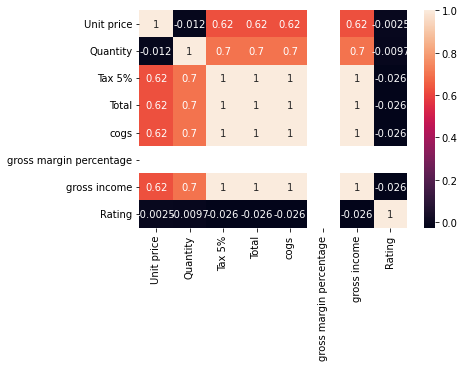

In [29]:
sns.heatmap(df.corr(),annot=True)